**Team 25**
- Name: Ziad Wael AbdlHamed       ID:20200211
- Name: Abdullah Yasser           ID:20200725
- Name: Fatma Ahmed               ID:20200373
- Name: Yahia                     ID:20200638
- Name: Sara                      ID:20200213

## FUZZY C MEAN IMPLEMENTATION FROM SCRATCH 
iris DataSet for clustring and testing to see the how the culstring done correctly 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data 

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
X = df.iloc[:, [0, 1, 2, 3]].values
X=X.astype(float)
X=np.array(X)

## PCA IMPLEMENTATION FROM SCRATCH

In [5]:
def _PCA(X):
   
    # 1. Standardize data by subtracting mean and dividing by standard deviation
    mean_values = X.mean(axis=0)
    std_values = X.std(axis=0)
    X_standardized = (X - mean_values) / std_values

    # 2. Covariance matrix From Scratch
    cov = np.dot(X_standardized.T, X_standardized) / (X_standardized.shape[0])  # (n_features, n_features)

    # 3. Eigen decomposition
    eigen_values, eigen_vectors = np.linalg.eig(cov)

    # 4. Sort eigen values in descending order
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]

    # 5. Q matrix
    Q = eigen_vectors

    return Q,std_values,mean_values


In [6]:
X_standardized = (X - X.mean(axis=0)) / X.std(axis=0)

In [7]:
def loss (X, X_reconstructed):
    return np.mean((X - X_reconstructed)**2)

In [8]:
lossList=[]
Q,std_values,mean_values=_PCA(X)
for _ in range(1,X.shape[1]+1):
    X_projected = np.dot(X_standardized ,Q[:,:_])
    X_reconstructed = np.dot(X_projected ,Q[:,:_].T)*std_values  + mean_values
    lossList.append(loss(X, X_reconstructed))
    print(f'loss for {_} components is {lossList[_-1].round(2)}')

loss for 1 components is 0.1
loss for 2 components is 0.04
loss for 3 components is 0.01
loss for 4 components is 0.0


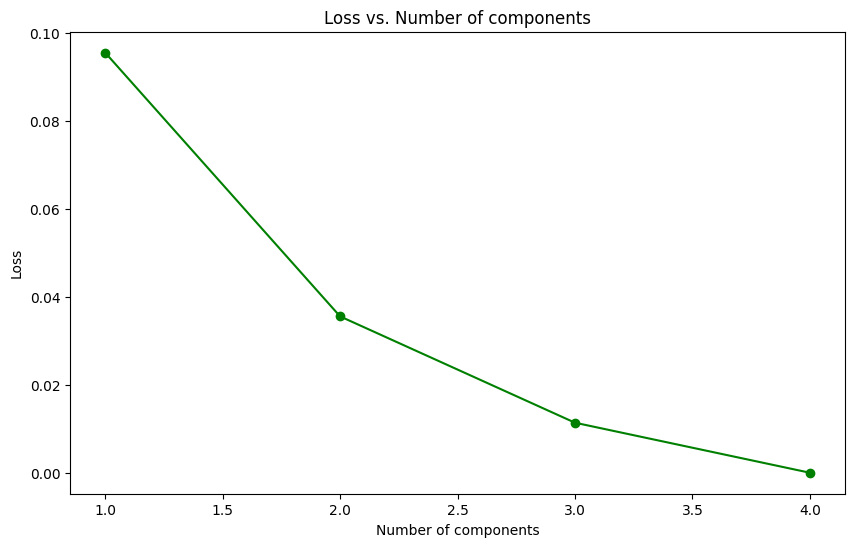

In [9]:
# Plotting the Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, X.shape[1]+1), lossList, marker='o', color='green')
plt.xlabel('Number of components')
plt.ylabel('Loss')
plt.title('Loss vs. Number of components')
plt.show()

## We see that the first two principal components loss is totaly fine and we can use them for our calusttering 

In [10]:
X_pca = np.dot(X_standardized ,Q[:,:2]) # 2 components only

C:\Users\ziadw\AppData\Local\Temp\ipykernel_29724\3201026772.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="green", cmap='viridis')


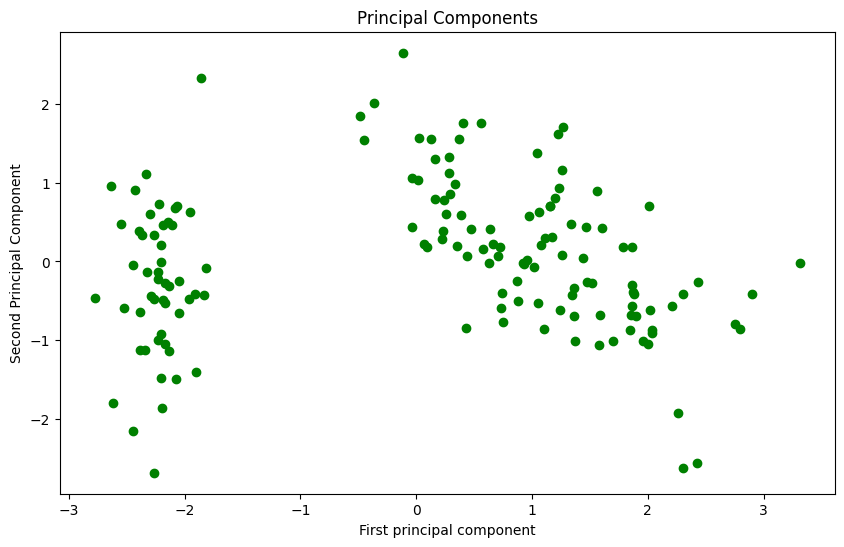

In [11]:
# Plotting the X_pca 
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c="green", cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Principal Components')
plt.show()

In [29]:
# utility values
data=X_pca
g=2
n=len(data)
c=3
p=len(data[0])
max_iter=100

In [13]:
def euclidean_distance(point1,point2):
    dis=0
    for i in range(len(point1)):
        dis+=(point1[i]-point2[i])**2
    return dis**0.5

### Fuzzy C Means Clustering Algorithm Implementation

In [14]:
import random
import math

def initialize_membership_matrix(n, c):
    member_mat = np.random.rand(n, c)
    member_mat /= member_mat.sum(axis=1, keepdims=True)
    return member_mat.tolist()

def update_centroid(member_mat):
    member_mat_g = np.power(member_mat, g)
    centroids = {}
    for j in range(c):
        add = np.sum(member_mat_g[:, j])
        x = np.dot(member_mat_g[:, j], data)
        val = x / add
        centroids[j] = val.tolist()
    return centroids


def update_membership_matrix(member_mat,centroids):
    ratio=float(2/(g-1))
    for i in range(n):
        distances=list()
        for j in range(c):
            distances.append(euclidean_distance(data[i],centroids[j]))
        for j in range(c):
            den = sum([math.pow(float(distances[j]/distances[q]), ratio) for q in range(c)])
            member_mat[i][j] = float(1/den) 
    return member_mat
                        
    
def find_cluster(member_mat):
    clusters=list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(member_mat[i]))
        clusters.append(idx)
    return clusters

def check(old_member_mat,member_mat):
    diff=0
    for i in range(n):
        for j in range(c):
            diff+=old_member_mat[i][j]-member_mat[i][j]
    if(diff<0.01):
        return True
    return False

def fuzzy_c_mean():
    member_mat=initialize_membership_matrix(n,c)
    for i in range(max_iter):
        centroids=update_centroid(member_mat)
        old_member_mat=member_mat
        member_mat=update_membership_matrix(member_mat,centroids)
        cluster=find_cluster(member_mat)
        if(check(old_member_mat,member_mat))<0.001:
            print(i)
            break
    
    
    return cluster,centroids


In [38]:
fuzyy_cluster,centroids=fuzzy_c_mean()
print(centroids)

{0: [-2.203989927866428, -0.2918598865172666], 1: [0.5196460690222015, 0.7724773273359964], 2: [1.7154654101942948, -0.5684038690478144]}


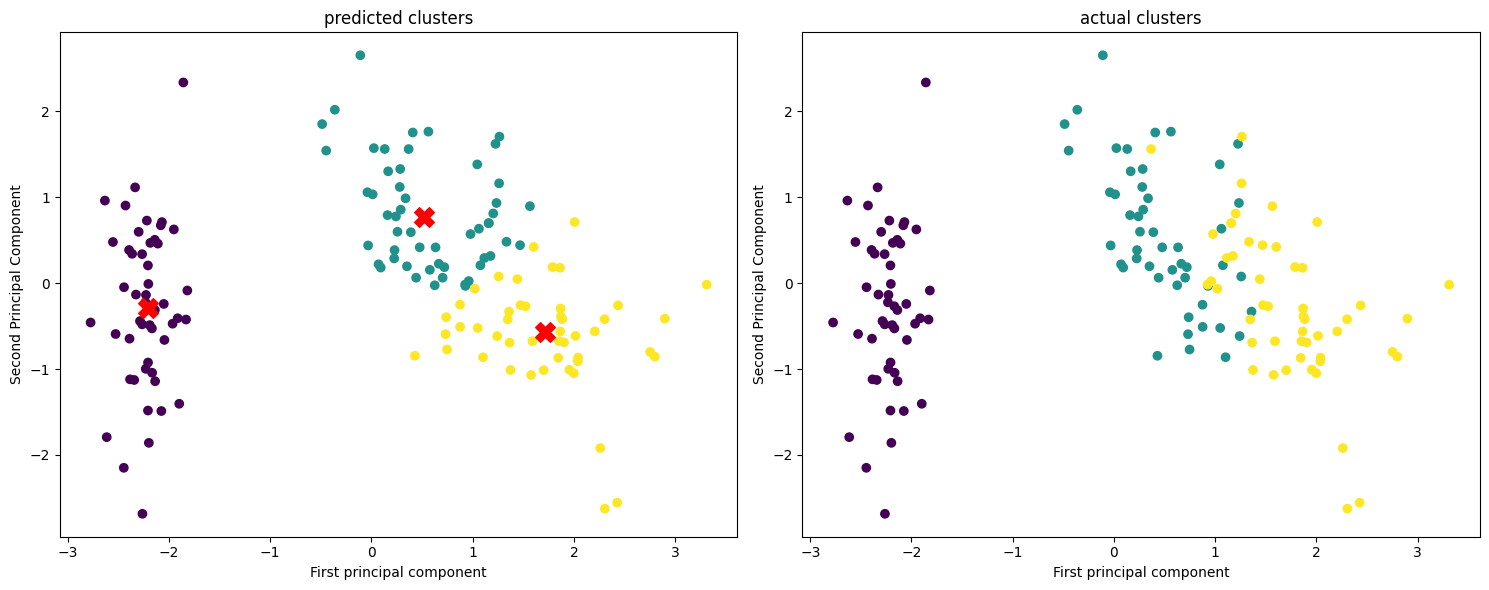

In [39]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=fuzyy_cluster, cmap='viridis')
plt.scatter(np.array(list(centroids.values()))[:,0], np.array(list(centroids.values()))[:,1], marker='X', s=200, c='red')

plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('predicted clusters')

# Plotting the second subplot
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('actual clusters')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [40]:
# update the original data with the cluster number
df['cluster'] = fuzyy_cluster
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [41]:
target = iris.target
# compare the original target and the cluster number
num_correct = 0
misclassified = []
for i in range(n):
    if target[i] == df['cluster'][i]:
        num_correct += 1
    else:
        misclassified.append(i)
accWithPca=(num_correct/n)*100       
print("Accuracy: ", accWithPca)

Accuracy:  83.33333333333334


In [42]:
misclassified=np.array(misclassified)
print("Misclassified data points: ", misclassified,"len: ",len(misclassified),"Out of ",n,"Data Points ")

Misclassified data points:  [ 50  51  52  56  65  70  75  76  77  85  86 101 106 113 114 119 121 123
 126 133 134 138 142 146 149] len:  25 Out of  150 Data Points 


C:\Users\ziadw\AppData\Local\Temp\ipykernel_29724\1715482726.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[misclassified, 0], X_pca[misclassified, 1], c='red', cmap='viridis')


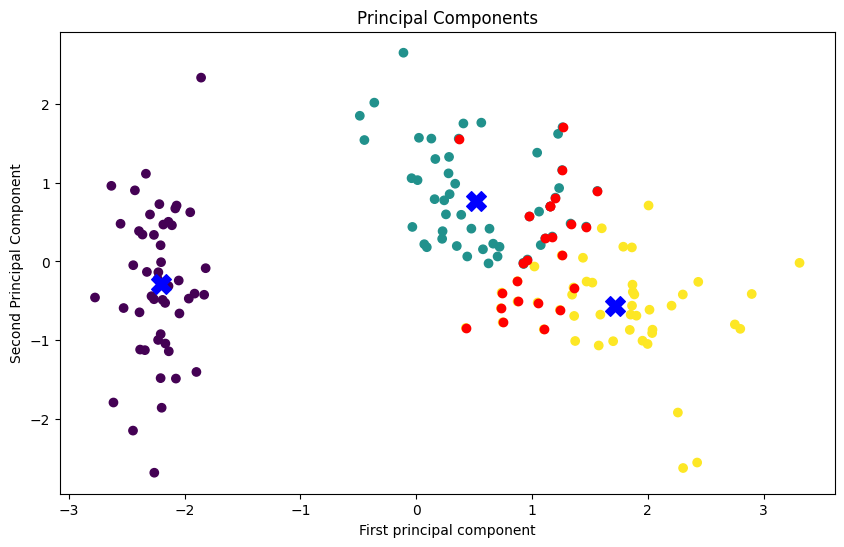

In [43]:
# Plotting the misclassified data points as red points
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=fuzyy_cluster, cmap='viridis')
plt.scatter(X_pca[misclassified, 0], X_pca[misclassified, 1], c='red', cmap='viridis')
plt.scatter(np.array(list(centroids.values()))[:,0], np.array(list(centroids.values()))[:,1], marker='X', s=200, c='blue')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Principal Components')
plt.show()


## Without PCA

In [45]:
# utility values
data=X
g=2
n=len(data)
c=3
p=len(data[0])
max_iter=100

In [56]:
fuzyy_cluster,centroids=fuzzy_c_mean()
print(centroids)

{0: [5.0039659606112545, 3.414088858778307, 1.4828155326056132, 0.2535463174787418], 1: [5.888932360609776, 2.7610693632044416, 4.363951643133038, 1.397315040707886], 2: [6.775011223752623, 3.052382271043555, 5.646781781918657, 2.0535466585408635]}


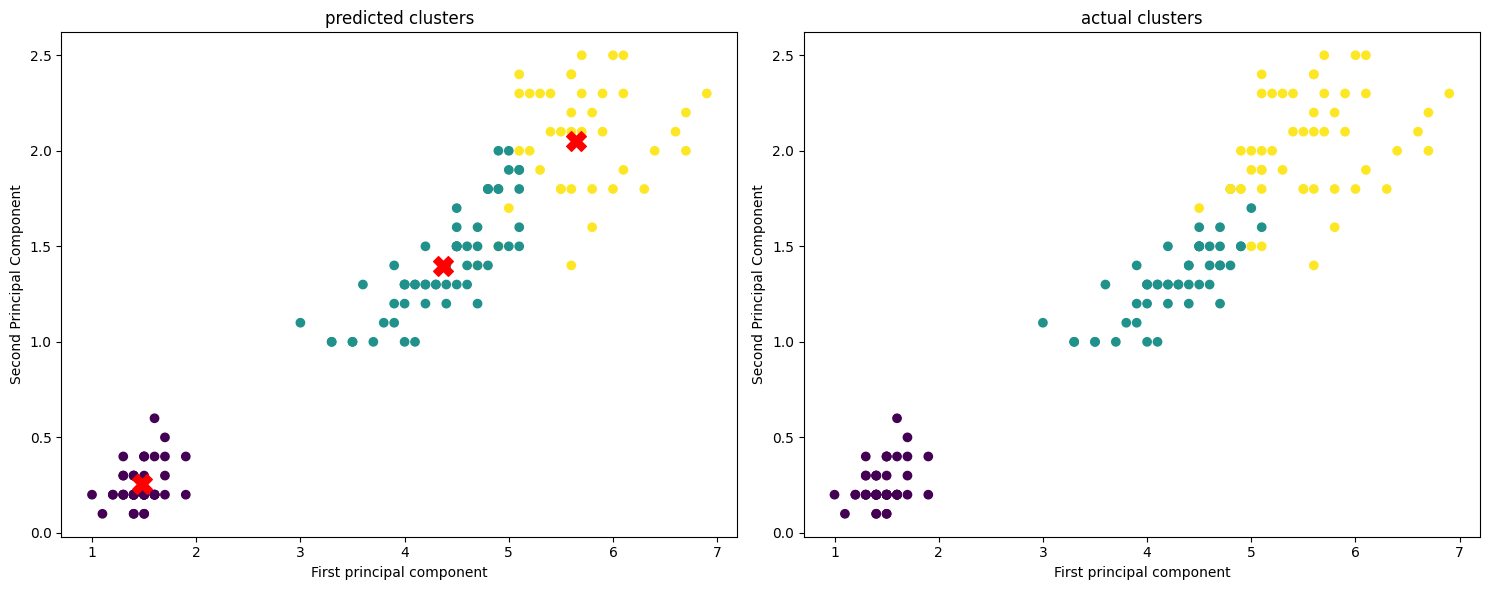

In [60]:
# Plotting the dimension 2 and 3 of the data points

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 2], X[:, 3], c=fuzyy_cluster, cmap='viridis')
plt.scatter(np.array(list(centroids.values()))[:,2], np.array(list(centroids.values()))[:,3], marker='X', s=200, c='red')

plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('predicted clusters')

# Plotting the second subplot
plt.subplot(1, 2, 2)
plt.scatter(X[:, 2], X[:, 3], c=iris.target, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('actual clusters')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [61]:
# update the original data with the cluster number
df['cluster'] = fuzyy_cluster
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [62]:
target = iris.target
# compare the original target and the cluster number
num_correct = 0
misclassified = []
for i in range(n):
    if target[i] == df['cluster'][i]:
        num_correct += 1
    else:
        misclassified.append(i)
accWithoutPca=(num_correct/n)*100       
print("Accuracy: ", accWithoutPca)

Accuracy:  89.33333333333333


In [63]:
misclassified=np.array(misclassified)
print("Misclassified data points: ", misclassified,"len: ",len(misclassified),"Out of ",n,"Data Points ")

Misclassified data points:  [ 50  52  77 101 106 113 119 121 123 126 127 133 138 142 146 149] len:  16 Out of  150 Data Points 


C:\Users\ziadw\AppData\Local\Temp\ipykernel_29724\1853003392.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[misclassified, 2], X[misclassified, 3], c='red', cmap='viridis')


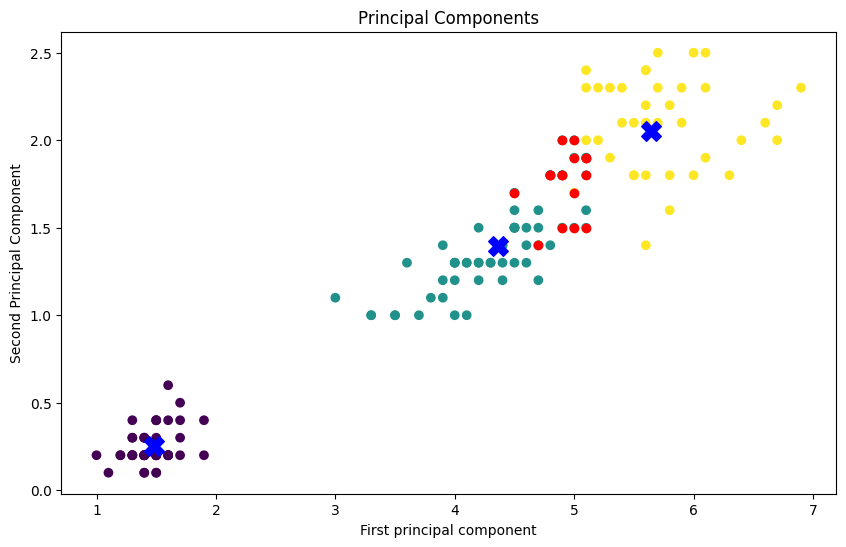

In [65]:
# Plotting the misclassified data points as red points
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 2], X[:, 3], c=fuzyy_cluster, cmap='viridis')
plt.scatter(X[misclassified, 2], X[misclassified, 3], c='red', cmap='viridis')
plt.scatter(np.array(list(centroids.values()))[:,2], np.array(list(centroids.values()))[:,3], marker='X', s=200, c='blue')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Principal Components')
plt.show()

Accuracy with PCA:  83.33333333333334
Accuracy without PCA:  89.33333333333333


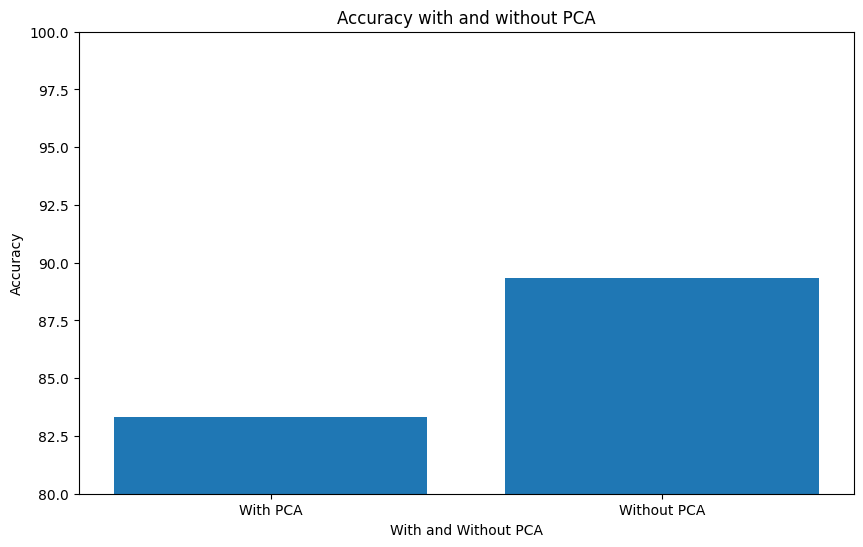

In [67]:
# Comparing the accuracy with and without PCA
print("Accuracy with PCA: ",accWithPca)
print("Accuracy without PCA: ",accWithoutPca)

# Plotting the accuracy with and without PCA
plt.figure(figsize=(10, 6))
plt.bar(["With PCA","Without PCA"],[accWithPca,accWithoutPca])
plt.xlabel('With and Without PCA')
plt.ylabel('Accuracy')
plt.title('Accuracy with and without PCA')
plt.ylim(80,100)
plt.show()

# Notebook Report: Fuzzy C-Means and PCA Implementation

## Objective
The goal of this notebook was to implement the Fuzzy C-Means (FCM) clustering algorithm and Principal Component Analysis (PCA) from scratch. The implementation aimed to showcase a hands-on understanding of these algorithms and their application in clustering, specifically on the well-known Iris dataset.

## Implemented Algorithms

### 1. Fuzzy C-Means (FCM)
- FCM is a soft clustering algorithm that assigns membership values to each data point for multiple clusters.
- Implemented the FCM algorithm with functions for initializing membership matrices, updating centroids, and iterating until convergence.
- Utilized NumPy for efficient array operations and simplified the code for clarity.

### 2. Principal Component Analysis (PCA)
- PCA is a dimensionality reduction technique used to transform data into a lower-dimensional space.
- Developed a PCA implementation to reduce the dimensionality of the Iris dataset for further analysis.
- Implemented the computation of eigenvalues and eigenvectors relying on external libraries(np.linalg.eig(cov)).

## Clustering Iris Dataset

**Dataset:** The Iris dataset, a classic dataset in machine learning, was used for clustering. It comprises features of iris flowers, and the goal was to group similar flowers into clusters.

**Fuzzy C-Means Clustering:**
- Implemented FCM for clustering the Iris dataset into fuzzy clusters.
- Tuned hyperparameters, such as the fuzziness coefficient (g), to achieve optimal clustering results.

**PCA Integration:**
- Applied PCA to reduce the dimensionality of the Iris dataset before clustering.
- Explored the impact of PCA on clustering accuracy and computation time.

## Results

**Without PCA:**
- Achieved an accuracy of 89% with Fuzzy C-Means clustering on the Iris dataset without PCA.

**With PCA:**
- Applied PCA for dimensionality reduction before FCM clustering.
- Achieved an accuracy of 83%, showcasing the trade-off between dimensionality reduction and clustering accuracy.

## Conclusion

This notebook demonstrated the implementation of Fuzzy C-Means clustering and Principal Component Analysis from scratch. The Iris dataset served as a practical example for evaluating the clustering performance. The results showcased the impact of dimensionality reduction through PCA on clustering accuracy, providing insights into the trade-offs involved in preprocessing steps. The overall implementation deepened the understanding of these fundamental machine learning concepts.
